In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.functional as F
from torch.utils.data import DataLoader

from config import Config
from img_transformer import ImgTransformer
from img_comment_dataset import ImgCommentDataset
from img_embedding import ImageEmbedding
from img_util import show_img_tensor_CHW

from pathlib import Path

from common_util import get_logger
logger = get_logger(__name__)

/opt/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Enriched img id: /tmp/enriched_results.csv
tokens: 128000
tokenizer.is_fast: True
batch_img_tensor: torch.Size([2, 3, 224, 224])
batch_img_id_tensor: torch.Size([2])
batch_comment_encoding: torch.Size([2, 50])
batch_comment_mask: torch.Size([2, 50])


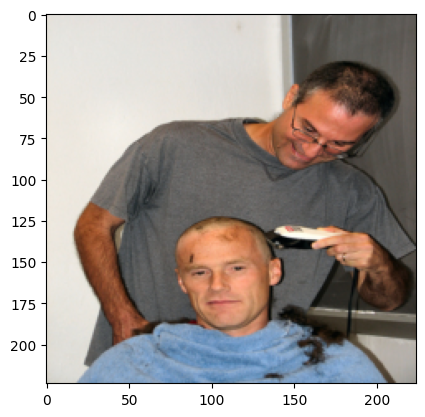

In [2]:
config = Config()
train_dataset = ImgCommentDataset(config, split="train")

BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

batch_img_tensor, batch_img_id_tensor, batch_comment_encoding, batch_comment_mask = (
    next(iter(train_dataloader))
)
logger.info(f"batch_img_tensor: {batch_img_tensor.size()}")
logger.info(f"batch_img_id_tensor: {batch_img_id_tensor.size()}")
logger.info(f"batch_comment_encoding: {batch_comment_encoding.size()}")
logger.info(f"batch_comment_mask: {batch_comment_mask.size()}")

show_img_tensor_CHW(img_tensor=batch_img_tensor[0])

In [3]:
img_embedding = ImageEmbedding(config=config)
img_embedding = img_embedding(batch_img_tensor)
logger.info(f"img_encoding: {img_embedding.size()}")

img_trans = ImgTransformer(config=config)
batch_img_feature = img_trans(img_embedding)
logger.info(f"batch_img_feature: {batch_img_feature.size()}")

img_encoding: torch.Size([2, 196, 728])
batch_img_feature: torch.Size([2, 196, 728])
